# Homework 7: Optimization for physics

**Due Friday, March 8**  

*Aidan-James Olvera*  

### Homework checklist

Before submitting, make sure that you

- Fill in your name in the space above
- Cite any resources that you used while working on this homework
- 1.a. Fill in the code to define the potential function  
- 1.b. Fill in the code to plot the potential  
- 2.a. Compute the derivative and fill in the code to evaluate it  
- 2.b. Fill in the code for the steepest descent algorithm  
- 3.a. Run the steepest descent algorithm
- 3.b. Compare the results from 3.a. to your plot 
- 3.c. Run the steepest descent algorithm again with different initial conditions  
- 3.d. Explain why we now get an incorrect answer, and how we could guard against this  

## Discussion

This problem is derived from Example 6.5 in Newman's *[Computational Physics](http://www-personal.umich.edu/~mejn/cp/)* textbook.

The [Buckingham potential](https://en.wikipedia.org/wiki/Buckingham_potential), 

$$V(r) = V_0 \left[\left(\frac{\sigma}{r}\right)^6-e^{-r/\sigma}\right]\,,$$

is an approximate function for the potential energy between atoms at a distance $r$ from one another. This potential contains short-ranged repulsive and longer-ranged attractive terms. The net result is that the potential energy is minimized at an intermediate distance, for which there is no analytical expression. The goal of this homework assignment will be to numerically compute the minimum.

## 1. Visualize the potential

First, let's see what the Buckingham potential looks like. For simplicity, we'll choose parameters $V_0=1$ and $\sigma=1$. 

### 1.a. Define the function

Fill in the code below to define a function, `buckingham`, that outputs the value of the potential as a function of the distance $r$.

In [7]:
import numpy as np


# Write the function to evaluate the Buckingham potential

def buckingham(r):
    """ 
    Returns the value of the Buckingham potential at distance r.
    Parameters V_0 and sigma are set to 1.
    """
    
    # Set V_0 and sigma
    
    V_0   = 1
    sigma = 1
    
    # Evaluate the potential and return
    
    potential = V_0 * [((sigma/r)**6) - np.exp( -r / sigma )]
    
    return  potential # FILL THIS IN (you may want to use np.exp for the exponential)

buckingham(1.5)

[-0.13533866494952723]

### 1.b. Plot the potential curve

Fill in the code below to plot the value of the potential over the range $[0.5, 4]$. We'll set the limits of the $y$ axis by hand so that the plot is not dominated by large values of the potential for small $r$

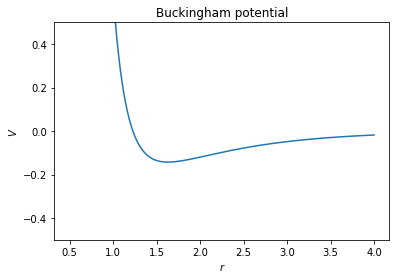

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


V = 0

r_values =  np.linspace(0.5, 4, 1234) # FILL THIS IN
V_values =  [] # FILL THIS IN

for r in r_values:
    V = buckingham(r)
    V_values.append(V)

    
plt.figure()
plt.plot(r_values, V_values)
plt.title(r'Buckingham potential')
plt.ylim([-0.5, 0.5])
plt.xlabel(r'$r$')
plt.ylabel(r'$V$');
plt.show()

## 2. Set up the optimization algorithm

We'll use simple steepest descent to find the minimum of the Buckingham potential. You may want to refer back to lecture 15 for an example application. The steps of the algorithm are:

1. Compute the direction of steepest descent $\underline{s}$, given by the derivative $\underline{s} = -\nabla f(\underline{x}_k)$
2. Choose a distance $t$ to step along this direction
3. Update the parameters $\underline{x}_{k+1} = \underline{x}_k + t \underline{s}$

### 2.a. Define the derivative function

Fill in the code below to define a function `df` that returns the derivative of the Buckingham potential function at distance $r$. You'll need to first compute the derivative by hand, then code it in the function.

In [3]:
# Define the derivative of the Buckingham potential as a function of r
import numpy as np
def df(r):
    """
    Returns the derivative of the Buckingham potential as a function of the distance r.
    We set V_0 and sigma = 1.
    """
    
    # Set V_0 and sigma
    
    V_0   = 1
    sigma = 1
    
    # Compute the derivative and return
    
    derivative = V_0 * [ (-6 * (sigma**6) / (r**7)) + (1 / sigma) * np.exp( - r / sigma) ]
    
    return  derivative # FILL THIS IN

df(0.5)

[-767.3934693402873]

### 2.b. Code the steepest descent algorithm

Fill in the code below to define a function `steepest_descent` that uses the steepest descent algorithm to find the minimum of a function. The input to the function is the derivative function, `df`, and the starting value, `x0`. This problem is simple enough that we can choose a constant step size $t = 0.1$ and obtain fairly good results. 

In [40]:
def steepest_descent(df, x0):
    """
    Run the steepest descent algorithm to find the minimum of the function whose gradient is df.
    The starting value for the function is x0.
    """
    
    # Initialize the system
    
    epsilon  = 0.0001  # Stopping condition -- end when |df/dx| < epsilon 
    max_iter = 100     # Maximum number of iterations
    it       = 0       # Current iteration
    
    x    = x0     # Current parameter value
    dfdx =  df(.5) # FILL THIS IN, Initial value of the derivative
    
    # Report status
    print('iter\tx\tdf/dx')
    
    
    # Execute the steepest descent algorithm
    
    while np.fabs(dfdx)>=epsilon and it<max_iter:
    
        # Report status
        #print('%d\t%.4f\t%.4f' % (it, x, dfdx))

        # Choose the step direction
        s =  1 # FILL THIS IN

        # Choose how far to step in that direction
        t  = 0.1

        # Update the parameters
        x += t * s# FILL THIS IN

        # Update the derivative
        dfdx = df(x) # FILL THIS IN

        # Update the iteration counter
        it += 1
        

    # Return the result
        
    return x

## 3. Find the minimum

Now that we've defined the steepest descent algorithm, the next step is to run it and find the minimum of the Buckingham potential.

### 3.a. Run the steepest descent algorithm

Fill in the code to run the steepest descent algorithm. We'll start at an initial value of $r = 1$.

In [41]:
# Define the starting position

x0 = 1 # FILL THIS IN


# Run steepest descent

x_min = steepest_descent(df, x0) # FILL THIS IN, use your steepest_descent function to find the minimum


# Print the results
print('Found the minimum at r = %.4f' % x_min)
print('V(r) = ',  buckingham(x_min))
#'At this point the value of the potential is V(r) = %.4f' %

iter	x	df/dx
Found the minimum at r = 9.2000
V(r) =  [-9.93902029391168e-05]


### 3.b. Analyze the results

Compare your results from from 3.a. to the plot you made in 1.b. Does the result appear to be correct? Are you sure that this is the global minimum of the function? Fill in your response in the Markdown cell below.

The code I wrote is giving me a minimum ar r = 9.2 but from the graph I see that there is a minimum at r = 1.5. There must be something wrong with my equations but I double checked them and I can't see a mistake.

### 3.c. Pathological results

Copy your code from part 3.a. and run it again, but this time set `x0 = 0.68`.

In [42]:
# < Your code from 3.a. here! Remember to change x0. >
# Define the starting position

x0 = .68 # FILL THIS IN


# Run steepest descent

x_min = steepest_descent(df, x0) # FILL THIS IN, use your steepest_descent function to find the minimum


# Print the results
print('Found the minimum at r = %.4f' % x_min)
print('V(r) = ',  buckingham(x_min))
#'At this point the value of the potential is V(r) = %.4f' %

iter	x	df/dx
Found the minimum at r = 9.2800
V(r) =  [-9.170541051837337e-05]


### 3.d. Explain what went wrong

The value of the "minimum" that you find in 3.c. above should be much larger than the value that you got in 3.a. You can also verify that the value of the function at that distance is higher than in 3.a.

In the Markdown cell below, explain why we find the wrong result in this case. What changes could you make to our optimization algorithm to prevent this from happening? Remember that there is no one correct answer here -- there are many possible strategies that we could take to avoid these errors. How would you approach a problem like this if you encountered it in your research?

I see an increase in the r value but it is not super huge. This could come from the fact that we only allow 100 iterations, if we allow the function to run longer than that it may get closer to the true value